# Persiapan Data

In [5]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")


url = 'https://raw.githubusercontent.com/edinugroho/Final-Task-Machine-Learning/master/used_cars.csv'
used_cars = pd.read_csv(url)

used_cars.region = pd.factorize(used_cars.region)[0]
used_cars.url = pd.factorize(used_cars.url)[0]
used_cars.region_url = pd.factorize(used_cars.region_url)[0]
used_cars.manufacturer = pd.factorize(used_cars.manufacturer)[0]
used_cars.model = pd.factorize(used_cars.model)[0]
used_cars.year = pd.factorize(used_cars.year)[0]
used_cars.condition = pd.factorize(used_cars.condition)[0]
used_cars.cylinders = pd.factorize(used_cars.cylinders)[0]
used_cars.odometer = pd.factorize(used_cars.odometer)[0]
used_cars.title_status = pd.factorize(used_cars.title_status)[0]
used_cars.transmission = pd.factorize(used_cars.transmission)[0]
used_cars.vin = pd.factorize(used_cars.vin)[0]
used_cars.model = pd.factorize(used_cars.model)[0]
used_cars.image_url = pd.factorize(used_cars.image_url)[0]
used_cars.lat = pd.factorize(used_cars.lat)[0]
used_cars.drive = pd.factorize(used_cars.drive)[0]
used_cars['long'] = pd.factorize(used_cars['long'])[0]
used_cars['size'] = pd.factorize(used_cars['size'])[0]
used_cars['type'] = pd.factorize(used_cars['type'])[0]
used_cars['paint_color'] = pd.factorize(used_cars['paint_color'])[0]
used_cars['description'] = pd.factorize(used_cars['description'])[0]
used_cars['county'] = pd.factorize(used_cars['county'])[0]
used_cars['state'] = pd.factorize(used_cars['state'])[0]

used_cars.fuel.unique()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array(['gas', 'diesel', 'other', nan, 'electric', 'hybrid'], dtype=object)

In [0]:
#save file
used_cars.to_csv('clean-data.csv')

# Featue engineering

In [0]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
import numpy as np
import seaborn as sns
used_cars = pd.read_csv('clean-data.csv', index_col=False)
used_cars.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1, inplace=True)

data_mean=used_cars.iloc[:,1:20]

corr = data_mean.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(20, 20))
plt.title('Fuel Feature Correlation')

# Generate colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# membuat heatmap
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=1)

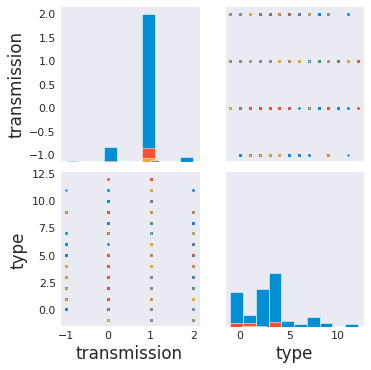

In [0]:
plt.style.use('fivethirtyeight')
sns.set_style("dark")
used_cars = pd.read_csv('clean-data.csv',usecols=['fuel','transmission','type'], index_col=False)
# used_cars.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1, inplace=True)
used_cars
# used_carsn = used_cars['fuel'],used_cars['type'],used_cars['transmission']
g = sns.PairGrid(used_cars, hue='fuel')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

# Pre Processing

In [0]:
import pandas as pd
used_cars = pd.read_csv('clean-data.csv',usecols=['fuel','transmission','type'], index_col=False)
used_cars.dropna(inplace=True)
X = used_cars.drop(['fuel'], axis = 1) #keluarkan dependen
y = used_cars['fuel']

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = pd.Series(le.fit_transform(y),name='fuel') #ubah ke angka

In [22]:
combine = X.join(y)
combine.head(10)

,transmission,type,fuel
0,0,0,2.0
1,1,-1,2.0
2,1,-1,2.0
3,1,-1,2.0
4,1,1,0.0
5,1,1,2.0
6,1,1,0.0
7,1,1,2.0
8,1,1,2.0
9,1,1,0.0


StandardScaler(copy=True, with_mean=True, with_std=True)

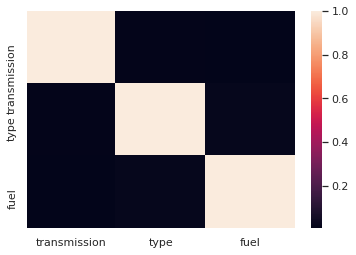

In [23]:
combine['fuel'].unique()
ax = sns.heatmap(combine.corr())
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
norm.fit(X)

MEMBUAT DATA TEST DAN DATA TRAIN

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print ('The size of our training "X" (input features) is', X_train.shape)
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (15942, 2)
The size of our testing "X" (input features) is (3986, 2)
The size of our training "y" (output feature) is (15942,)
The size of our testing "y" (output features) is (3986,)


# SVM

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)
print('akurasi : ',accuracy_score(y_test,y_predict))
print(classification_report(y_test, y_predict))
cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_predict, labels=[0,1,2,3,4]), 
    index=['gas', 'diesel', 'other', 'electric', 'hybrid'], 
    columns=['gas', 'diesel', 'other', 'electric', 'hybrid']
)
cmtx

akurasi :  0.8881083793276467
              precision    recall  f1-score   support

           0       0.80      0.01      0.02       317
           1       0.00      0.00      0.00         6
           2       0.89      1.00      0.94      3537
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        84

    accuracy                           0.89      3986
   macro avg       0.34      0.20      0.19      3986
weighted avg       0.85      0.89      0.84      3986



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,gas,diesel,other,electric,hybrid
gas,4,0,313,0,0
diesel,0,0,6,0,0
other,1,0,3536,0,0
electric,0,0,42,0,0
hybrid,0,0,84,0,0


# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train,y_train)
y_predict = neigh.predict(X_test)
print('akurasi : ',accuracy_score(y_test,y_predict))
print(classification_report(y_test, y_predict))
cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_predict, labels=[0,1,2,3,4]), 
    index=['gas', 'diesel', 'other', 'electric', 'hybrid'], 
    columns=['gas', 'diesel', 'other', 'electric', 'hybrid']
)
cmtx

akurasi :  0.8627696939287506
              precision    recall  f1-score   support

           0       0.31      0.31      0.31       317
           1       0.00      0.00      0.00         6
           2       0.91      0.94      0.93      3537
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        84

    accuracy                           0.86      3986
   macro avg       0.24      0.25      0.25      3986
weighted avg       0.83      0.86      0.85      3986



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,gas,diesel,other,electric,hybrid
gas,99,0,218,0,0
diesel,0,0,6,0,0
other,197,0,3340,0,0
electric,0,0,42,0,0
hybrid,25,0,59,0,0



# K-Mean


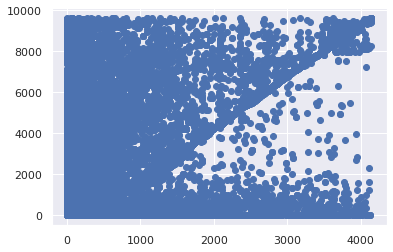

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import random
# used_cars = pd.read_csv('clean-data.csv',usecols=['fuel','transmission','type'], index_col=False)
used_cars = pd.read_csv('clean-data.csv', index_col=False)
# used_cars.dropnul(inplace=True)
used_cars.replace(to_replace = 0, value = 1)
x = used_cars['model']
y = used_cars['odometer']
# z = used_cars['transmission']
plt.scatter(x,y)
plt.show()

In [0]:
def distance(k,x,y,z):  
  dist = [[],[],[]]
  for i in range(len(k)):
    for j in range(len(x)):
      x1 = np.sqrt((k[i][0]-x[j])**2 + (k[i][1]-y[j])**2)
      dist[i].append(x1)
  return (dist)

In [0]:
def cluster(x,y,dist):
  clust = [[[],[]],[[],[]],[[],[]]]
  for i in range(len(x)):
    min = dist[0][i]
    for j in range(len(dist)):
      if(dist[j][i] < min):
        min = dist[j][i]
    for l in range(len(dist)):
      if(dist[l][i] == min):
        clust[l][0].append(x[i])
        clust[l][1].append(y[i])
  return (clust)

In [0]:
def newK(k):
  ncluster = [[],[],[]]
  nk0x = sum(k[0][0])/len(k[0][0])
  nk0y = sum(k[0][1])/len(k[0][1])
  ncluster[0].append(nk0x)
  ncluster[0].append(nk0y)

  nk1x = sum(k[1][0])/len(k[1][0])
  nk1y = sum(k[1][1])/len(k[1][1])
  ncluster[1].append(nk1x)
  ncluster[1].append(nk1y)

  nk2x = sum(k[2][0])/len(k[2][0])
  nk2y = sum(k[2][1])/len(k[2][1])
  ncluster[2].append(nk2x)
  ncluster[2].append(nk2y)
  return(ncluster)

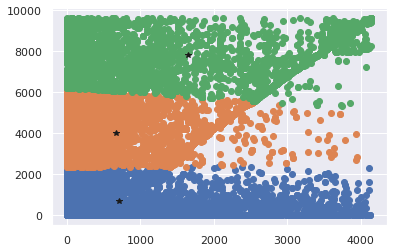

In [15]:
centeroid = [[],[],[]]
for i in range (3):
  a = random.randrange(len(used_cars))
  centeroid[i].append(used_cars.model[a])
  centeroid[i].append(used_cars.odometer[a])

cond = True
while(cond == True):
  jarak = distance(centeroid,x,y,used_cars)
  clust = cluster(x,y,jarak)
  centerold = newK(clust)
  if(centeroid == centerold):
    cond = False
  else:
    centeroid = centerold

for i in range (len(clust)):
  plt.scatter(clust[i][0],clust[i][1])

for i in range (len(centeroid)):
  plt.plot(centeroid[i][0],centeroid[i][1],'k*')